# SREELEKSHMY A
# 20MAI0017

Since its Placement season, I thought I wil develop a classifier related to that. 
I developed a simple ML model to classify whether a person prefer working for Service based companies or Product based companies. 
For the survey purpose, I created a Google from and circulated among people from different background which include UG students, PG students and Professionals. 
The dataset is focused on Engineering domain.

My Predictor variables include GENDER, AGE, QUALIFICATION, STREAM, WORK EXPERIENCE, AREA OF INTEREST and important FACTOR one will consider while looking for a new job. 
The Response variable is whether he prefer Service based companies or Product based companies.

If a person consider Learning curve as an important factor, then he might prefer Product based companies. 
If a person is looking for a time bound job, he will prefer Service based companies. 
Age and Gender also plays an important role. 

https://github.com/sreelekshmyanil/ML-Assignments---VIT

# 1. Dataset Exploration

In [77]:
import pandas as pd
df = pd.read_csv(r"C:\Users\sree\Desktop\RESEARCH SURVEY.csv")

In [78]:
df.head()

Timestamp Gender Age group  \
0  2021/03/25 11:36:12 am GMT+5:30      F     20-25   
1  2021/03/25 11:36:38 am GMT+5:30      M     20-25   
2  2021/03/25 11:37:06 am GMT+5:30      F     20-25   
3  2021/03/25 11:39:17 am GMT+5:30      F     18-20   
4  2021/03/25 11:39:42 am GMT+5:30      M     18-20   

  Qualification (completed / ongoing)         Stream Work Experience  \
0                                  UG  ECE / Related              No   
1                                  UG  ECE / Related              No   
2                                  PG  CSE / Related             Yes   
3                                  UG  ECE / Related              No   
4                                  UG  ECE / Related              No   

     Area of Interest  \
0                Both   
1  Software Companies   
2  Software Companies   
3                Both   
4                Both   

  Important factor you consider when looking for a new job  \
0                                             Salary         
1                               Learning Opportunity         
2                                       Work Culture         
3                               Learning Opportunity         
4                               Learning Opportunity         

  Type of company you prefer Unnamed: 9 Unnamed: 10 Unnamed: 11  
0              Service based        NaN         NaN         NaN  
1              Product based        NaN         NaN         NaN  
2              Product based        NaN         NaN         NaN  
3              Product based        NaN         NaN         NaN  
4              Service based        NaN         NaN         NaN

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 12 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   Timestamp                                                 58 non-null     object
 1   Gender                                                    58 non-null     object
 2   Age group                                                 58 non-null     object
 3   Qualification (completed / ongoing)                       58 non-null     object
 4   Stream                                                    58 non-null     object
 5   Work Experience                                           58 non-null     object
 6   Area of Interest                                          58 non-null     object
 7   Important factor you consider when looking for a new job  58 non-null     object
 8   Type of company you prefer      

In [80]:
df.describe()

Timestamp Gender Age group  \
count                                58     58        58   
unique                               58      3         3   
top     2021/03/25 12:02:10 pm GMT+5:30      F     20-25   
freq                                  1     32        35   

       Qualification (completed / ongoing)         Stream Work Experience  \
count                                   58             58              58   
unique                                   2              3               2   
top                                     UG  CSE / Related              No   
freq                                    33             28              36   

       Area of Interest  \
count                58   
unique                3   
top                Both   
freq                 29   

       Important factor you consider when looking for a new job  \
count                                                  58         
unique                                                  4         
top                                  Learning Opportunity         
freq                                                   30         

       Type of company you prefer Unnamed: 9 Unnamed: 10    Unnamed: 11  
count                          58          9           5              5  
unique                          2          3           2              2  
top                 Product based        Yes         Yes  Product based  
freq                           39          7           3              4

In [81]:
df.columns

Index(['Timestamp', 'Gender', 'Age group',
       'Qualification (completed / ongoing)', 'Stream', 'Work Experience',
       'Area of Interest',
       'Important factor you consider when looking for a new job',
       'Type of company you prefer', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11'],
      dtype='object')

In [82]:
#dataset Visualization
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='Gender', ylabel='count'>

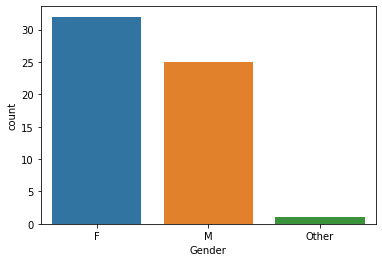

In [83]:
sns.countplot(x ='Gender', data = df)

<AxesSubplot:xlabel='Age group', ylabel='count'>

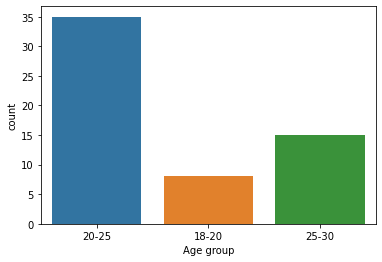

In [84]:
sns.countplot(x ='Age group', data = df)

<AxesSubplot:xlabel='Important factor you consider when looking for a new job', ylabel='count'>

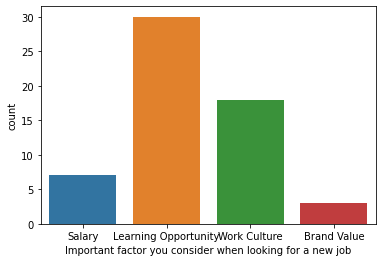

In [85]:
sns.countplot(x ='Important factor you consider when looking for a new job', data = df)

<AxesSubplot:xlabel='Area of Interest', ylabel='count'>

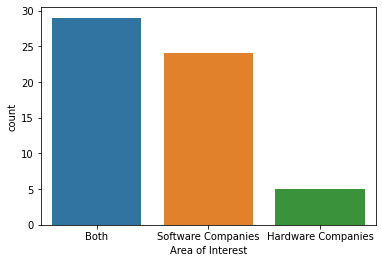

In [86]:
sns.countplot(x ='Area of Interest', data = df)

# 2. Dataset Preparation 

In [87]:
df = df.drop(['Timestamp'], axis = 1)

In [88]:
#drop unnamed
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [89]:
df.shape

(58, 8)

In [90]:
#renaming columns

In [91]:
df.columns

Index(['Gender', 'Age group', 'Qualification (completed / ongoing)', 'Stream',
       'Work Experience', 'Area of Interest',
       'Important factor you consider when looking for a new job',
       'Type of company you prefer'],
      dtype='object')

In [92]:
df.rename(columns={'Qualification (completed / ongoing)': 'Qualification', 'Area of Interest': 'Interest','Important factor you consider when looking for a new job': 'Factors'}, inplace=True)

In [93]:
df.columns

Index(['Gender', 'Age group', 'Qualification', 'Stream', 'Work Experience',
       'Interest', 'Factors', 'Type of company you prefer'],
      dtype='object')

# >> Lets see our target variable

In [94]:
df['Type of company you prefer'][:10]

0    Service based
1    Product based
2    Product based
3    Product based
4    Service based
5    Service based
6    Product based
7    Product based
8    Service based
9    Product based
Name: Type of company you prefer, dtype: object

In [95]:
df.rename(columns={'Type of company you prefer': 'Response'}, inplace=True)

<AxesSubplot:xlabel='Response', ylabel='count'>

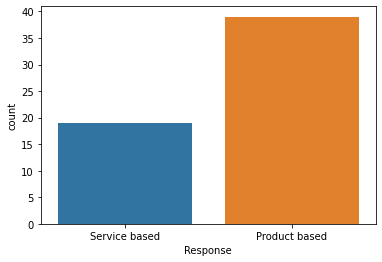

In [96]:
sns.countplot(x ='Response', data = df)

Note : From the graph we can see that the target variable is imbalanced.
Thus there is a chance that our model becomes biased to one class.

# Imbalanced Classes :(

# >> Upsample Minority class

Up-sampling is the process of randomly duplicating observations from the minority class in order to reinforce its signal.

There are several heuristics for doing so, but the most common way is to simply resample with replacement.

In [97]:
s = df[df.Response == 'Service based']
p = df[df.Response == 'Product based']

In [98]:
from sklearn.utils import resample
s_upsampled = resample(s,
                          replace=True,
                          n_samples=len(p),
                          random_state=42)

In [99]:
s_upsampled.shape

(39, 8)

In [100]:
df = df[df.Response != 'Service based']

In [101]:
df = pd.concat([df,s_upsampled])

<AxesSubplot:xlabel='Response', ylabel='count'>

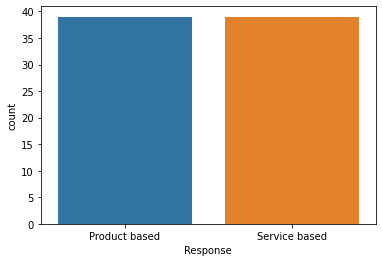

In [102]:
sns.countplot(x ='Response', data = df)

# 3. Encoding

Machine learning models require all input and output variables to be numeric.

This means that if your data contains categorical data, you must encode it to numbers before you can fit and evaluate a model

In [103]:
df.dtypes

Gender             object
Age group          object
Qualification      object
Stream             object
Work Experience    object
Interest           object
Factors            object
Response           object
dtype: object

In [104]:
print(df.isnull().values.sum())

0


In [105]:
from sklearn import preprocessing

In [106]:
lb = preprocessing.LabelBinarizer()

In [107]:
df['Response'] = lb.fit_transform(df['Response'])

In [108]:
df['Work Experience'] = lb.fit_transform(df['Work Experience'])

In [109]:
df.head()

Gender Age group Qualification         Stream  Work Experience  \
1      M     20-25            UG  ECE / Related                0   
2      F     20-25            PG  CSE / Related                1   
3      F     18-20            UG  ECE / Related                0   
6      M     25-30            UG  CSE / Related                1   
7      F     18-20            UG  ECE / Related                0   

             Interest               Factors  Response  
1  Software Companies  Learning Opportunity         0  
2  Software Companies          Work Culture         0  
3                Both  Learning Opportunity         0  
6  Software Companies  Learning Opportunity         0  
7                Both  Learning Opportunity         0

In [110]:
lb = preprocessing.LabelEncoder()
df['Gender'] = lb.fit_transform(df['Gender'])
df['Age group'] = lb.fit_transform(df['Age group'])
df['Qualification'] = lb.fit_transform(df['Qualification'])
df['Stream'] = lb.fit_transform(df['Stream'])
df['Interest'] = lb.fit_transform(df['Interest'])
df['Factors'] = lb.fit_transform(df['Factors'])

In [111]:
df.head()

Gender  Age group  Qualification  Stream  Work Experience  Interest  \
1       1          1              1       1                0         2   
2       0          1              0       0                1         2   
3       0          0              1       1                0         0   
6       1          2              1       0                1         2   
7       0          0              1       1                0         0   

   Factors  Response  
1        1         0  
2        3         0  
3        1         0  
6        1         0  
7        1         0

# 4. Its time to seperate our Features and target variable

In [112]:
y = df['Response']

In [113]:
x = df.loc[:, df.columns != 'Response']

In [114]:
x[:5]

Gender  Age group  Qualification  Stream  Work Experience  Interest  \
1       1          1              1       1                0         2   
2       0          1              0       0                1         2   
3       0          0              1       1                0         0   
6       1          2              1       0                1         2   
7       0          0              1       1                0         0   

   Factors  
1        1  
2        3  
3        1  
6        1  
7        1

In [115]:
y[:5]

1    0
2    0
3    0
6    0
7    0
Name: Response, dtype: int32

# 5. Now, Our MODEL

In [116]:
#First we need to split our dataset for training and testing purpose

In [117]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size = 0.3, random_state = 25)

In [118]:
print("Training set size : ",X_train.shape[0])
print("Testing set size : ",X_test.shape[0])

Training set size :  54
Testing set size :  24


#          >> Implementing a Binary Classifier

In [119]:
import sklearn as sk

In [120]:
from sklearn.linear_model import LogisticRegression

Logistic regression is a linear classification method that learns the probability of a sample belonging to a certain class. 
Logistic regression tries to find the optimal decision boundary that best separates the classes. Logistic regression directly models the posterior probability of P(y|x) by learning the input to output mapping by minimising the error.

In [121]:
model = LogisticRegression()

In [122]:
model.fit(X_train,Y_train)

LogisticRegression()

In [123]:
y_pred = model.predict(X_test)

In [124]:
y_pred

array([1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0])

# 6. Evaluation

In [125]:
# confusion matrix
from sklearn.metrics import confusion_matrix

In [126]:
confusion_matrix(Y_test, y_pred)

array([[ 7,  4],
       [ 3, 10]], dtype=int64)

<AxesSubplot:>

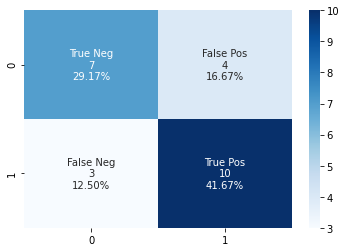

In [127]:
#visualizing our confusion matrix
import numpy as np
cf = confusion_matrix(Y_test, y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf, annot=labels, fmt='', cmap='Blues')

In [128]:
#accuracy score
from sklearn.metrics import accuracy_score

In [129]:
acc_logit = accuracy_score(Y_test,y_pred)
print("Accuracy score obtained is ",round(acc_logit,3))

Accuracy score obtained is  0.708


In [130]:
#Classification report
from sklearn.metrics import classification_report

In [131]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.64      0.67        11
           1       0.71      0.77      0.74        13

    accuracy                           0.71        24
   macro avg       0.71      0.70      0.70        24
weighted avg       0.71      0.71      0.71        24



# Conclusion

We obtained an accuracy of 70.8%